In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import numpy as np
import math
from scipy import signal
from scipy.fft import fft, ifft
import soundfile as sf
from IPython.display import Audio

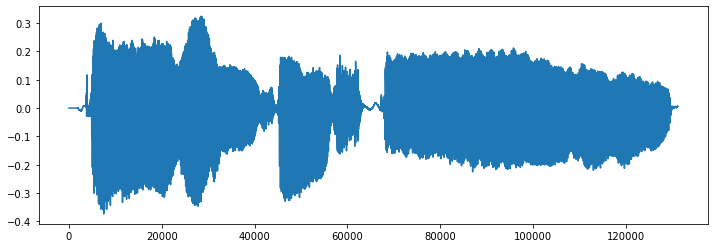

In [2]:
x, sr = sf.read('input/cathy.wav')

plt.rcParams["figure.figsize"] = (12,4)
plt.plot(x)


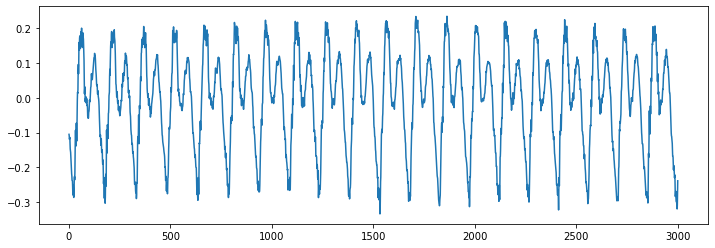

In [3]:
x, sr = sf.read('input/cathy.wav')
exampleStart = 10000
exampleLen = 3000

plt.rcParams["figure.figsize"] = (12,4)
plt.plot(x[exampleStart:exampleStart + exampleLen])



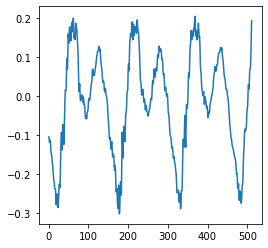

In [4]:
x, sr = sf.read('input/cathy.wav')
exampleStart = 10000
exampleLen = 3000

grainSize = 512
plt.rcParams["figure.figsize"] = (4,4)
plt.plot(x[exampleStart:exampleStart + grainSize])

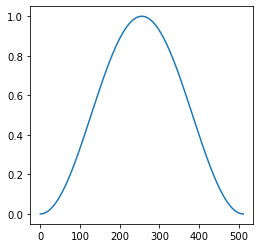

In [5]:
grainSize = 512
hanWin = np.hanning(grainSize)

plt.rcParams["figure.figsize"] = (4,4)
plt.plot(hanWin)

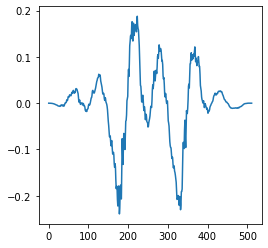

In [6]:
x, sr = sf.read('input/cathy.wav')
exampleStart = 10000
exampleLen = 3000

grainSize = 512
hanWin = np.hanning(grainSize)

windowedGrain = hanWin * x[exampleStart:exampleStart + grainSize]

plt.rcParams["figure.figsize"] = (4,4)
plt.plot(windowedGrain)

In [5]:
# Linear Interpolation
class LinearWrap(object):
    def __init__(self, it):
        self.it = it
        
    def __len__(self):
        return len(self.it)
        
    def __setitem__(self, inI, val):
        if type(inI) != int:
            raise RuntimeError('Can only write to integer values')
        self.it[inI] = val

    def __getitem__(self, inI):
        if type(inI) is int:
            return self.it[inI]
        loI = math.floor(inI)
        hiI = math.ceil(inI)
        a = inI - loI
        inRange = lambda val: val >= 0 and val < len(self.it)
        loX = self.it[loI] if inRange(loI) else 0
        hiX = self.it[hiI] if inRange(hiI) else 0
        return loX * (1-a) + hiX * a


def granulize(s, grainSize, hopSize, timeScale, freqScale, timeVariation, pitchVariation):
    numGrains = int(len(s) / hopSize)
    s = np.pad(s, (0, grainSize), 'constant')

    grainOutputPositions = np.zeros(numGrains, dtype=np.uint64)
    grainOutputPitches = np.zeros(numGrains)
    
    for grainNum in range(numGrains):
        grainPosition = hopSize * grainNum
        grainOutputPosition = grainPosition / timeScale
        grainOutputPositions[grainNum] = grainOutputPosition
        grainOutputPitches[grainNum] = freqScale

    grainOutputPositions[1:] = grainOutputPositions[1:] \
      + ((np.random.randn(numGrains - 1) * 2 - 1) * timeVariation)
    
    grainOutputPositions = grainOutputPositions.astype(np.uint64)
        
    grainOutputPitches = grainOutputPitches \
      + ((np.random.randn(numGrains) * 2 - 1) * pitchVariation)

    minOutputPitch = np.min(grainOutputPitches)
    outputGrainSize = int(grainSize / minOutputPitch) + 1
    lastGrainOutputPosition = grainOutputPositions[-1]
    outputLength = int(lastGrainOutputPosition + outputGrainSize) + grainSize

    print(outputLength)
    output = np.zeros(outputLength)
    grainOutput = np.zeros(outputGrainSize)
    
    hanWin = np.hanning(grainSize)
    
    for grainNum in range(numGrains):
        grainOutput.fill(0)

        grainPosition = hopSize * grainNum
        grainOutputPosition = int(grainOutputPositions[grainNum])
        grainPitch = grainOutputPitches[grainNum]
        
        windowedGrain = hanWin * s[grainPosition:grainPosition + grainSize]
        windowedGrain = LinearWrap(windowedGrain)
        for grainOuputIdx in range(outputGrainSize):
            grainInputIdx = grainOuputIdx * grainPitch
            grainOutput[grainOuputIdx] = windowedGrain[grainInputIdx]
        
        output[grainOutputPosition:grainOutputPosition+outputGrainSize] \
          += grainOutput
    
    return output

66561


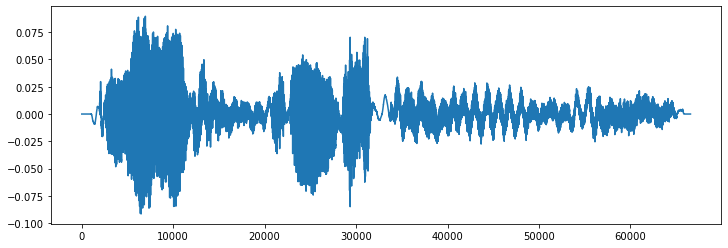

In [10]:
x, sr = sf.read('input/cathy.wav')
y = granulize(x, 512, 128, 2, 1, 0, 0) * 0.25

plt.rcParams["figure.figsize"] = (12,4)
plt.plot(y)

output = 'output/cathy_2xSpeed.wav'
sf.write(output, y, sr)
Audio(output)

270386


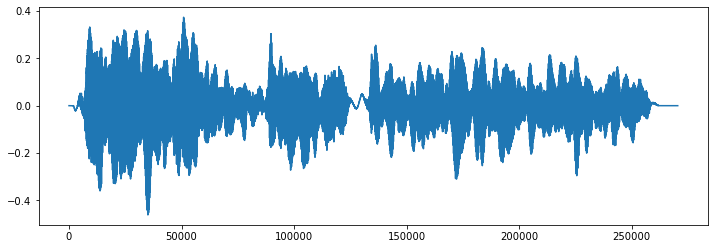

In [12]:
x, sr = sf.read('input/cathy.wav')
y = granulize(x, 4096, 64, 0.5, 1, 30, 0) * 0.25

plt.rcParams["figure.figsize"] = (12,4)
plt.plot(y)

output = 'output/cathy_0.5xSpeed.wav'
sf.write(output, y, sr)
Audio(output)



270546


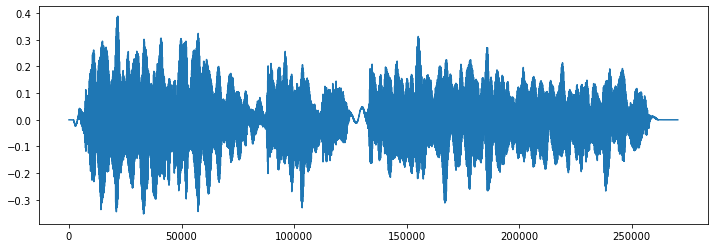

In [13]:
x, sr = sf.read('input/cathy.wav')
y = granulize(x, 4096, 64, 0.5, 1, 30, 0.004) * 0.25

plt.rcParams["figure.figsize"] = (12,4)
plt.plot(y)

output = 'output/cathy_0.5xSpeed_pitchVar.wav'
sf.write(output, y, sr)
Audio(output)




137945


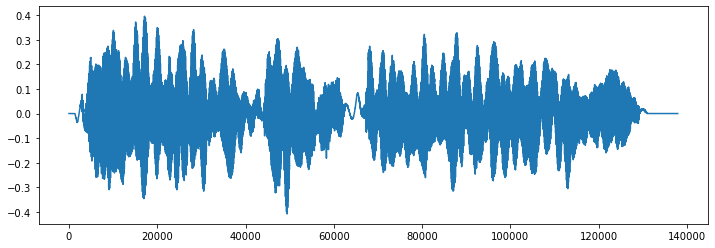

In [14]:
x, sr = sf.read('input/cathy.wav')
y = granulize(x, 4096, 64, 1, math.pow(2, 7/12), 30, 0) * 0.25

plt.rcParams["figure.figsize"] = (12,4)
plt.plot(y)

output = 'output/cathy_upAFifth.wav'
sf.write(output, y, sr)
Audio(output)

138500


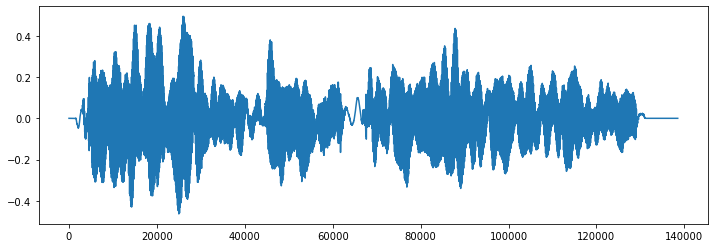

In [15]:
x, sr = sf.read('input/cathy.wav')
y = granulize(x, 4096, 64, 1, math.pow(2, 4/12), 30, 0) * 0.25

plt.rcParams["figure.figsize"] = (12,4)
plt.plot(y)

output = 'output/cathy_upAMaj3rd.wav'
sf.write(output, y, sr)
Audio(output)